# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as linregress
import numpy as np
import matplotlib.pyplot as plt
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_data["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
MouseUnique = mouse_data.loc[mouse_data["Mouse ID"] == "g989"] 
MouseUnique

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_cleaned = mouse_data.loc[mouse_data["Mouse ID"] != "g989"]
mouse_data_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_data_cleaned["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_drug_regimen = mouse_data_cleaned.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mouse_tumor_mean = mouse_drug_regimen["Tumor Volume (mm3)"].mean()
mouse_tumor_median = mouse_drug_regimen["Tumor Volume (mm3)"].median()
mouse_tumor_var = mouse_drug_regimen["Tumor Volume (mm3)"].var()
mouse_tumor_stddev = mouse_drug_regimen["Tumor Volume (mm3)"].std()
mouse_tumor_stderr = mouse_drug_regimen["Tumor Volume (mm3)"].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_tumor_data = {"Mean Tumor Volume":mouse_tumor_mean,
                    "Median Tumor Volume":mouse_tumor_median,
                    "Tumor Volume Variance":mouse_tumor_var,
                    "Tumor Volume Std. Dev":mouse_tumor_stddev,
                    "Tumor Volume Std. Error":mouse_tumor_stderr}
# Assemble the resulting series into a single summary DataFrame.
mouse_tumor_data = pd.DataFrame(mouse_tumor_data)
mouse_tumor_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
mouse_stats  = mouse_drug_regimen["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line
mouse_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number of Observed Mouse Timepoints'>

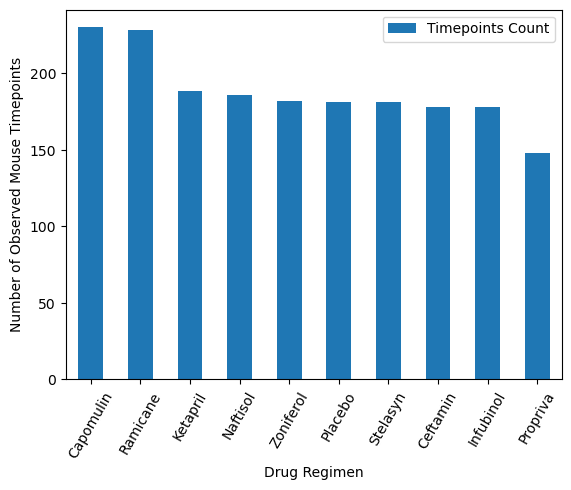

In [9]:
temp = mouse_drug_regimen["Drug Regimen"].count()
mouse_bar_plot_data = pd.DataFrame(temp)
mouse_bar_plot_data = mouse_bar_plot_data.rename(columns={"Drug Regimen": "Timepoints Count"})
mouse_bar_plot_data_sorted = mouse_bar_plot_data.sort_values(by="Timepoints Count", ascending = False)
mouse_bar_chart = mouse_bar_plot_data_sorted.plot(kind='bar', ylabel = "Number of Observed Mouse Timepoints")
mouse_bar_chart.set_xticklabels(mouse_bar_chart.get_xticklabels(), rotation=60)
mouse_bar_chart



In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


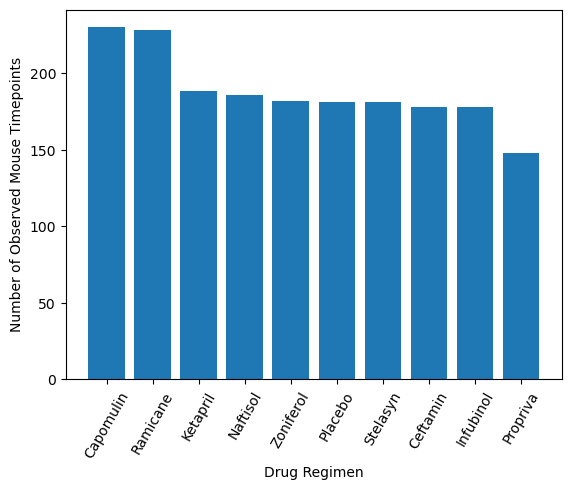

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(0, len(temp))
plt.bar(x_axis, mouse_bar_plot_data_sorted["Timepoints Count"])
tick_location = [value for value in x_axis]
plt.xticks(tick_location, mouse_bar_plot_data_sorted.index, rotation = 60)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.show()


<Axes: ylabel='Sex'>

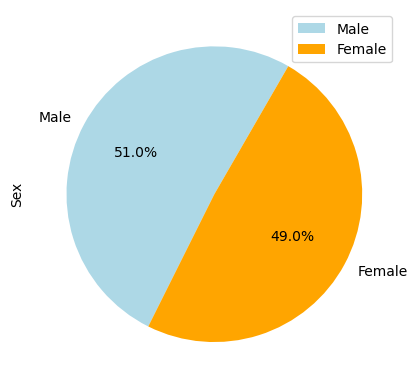

In [12]:
gender_count = mouse_data_cleaned["Sex"].value_counts()
mouse_gender_df = pd.DataFrame(gender_count)
labels = mouse_gender_df.index
colors = ["lightblue", "orange"]
mouse_pie_chart = mouse_gender_df.plot(kind='pie', y = 'count', ylabel = 'Sex', labels = labels, colors = colors, autopct="%1.1f%%", startangle = 60)
mouse_pie_chart

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


Text(0, 0.5, 'Sex')

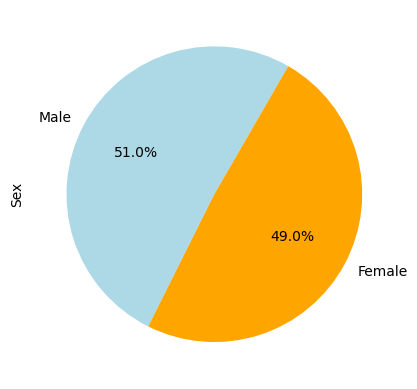

In [14]:
plt.pie(mouse_gender_df["count"], labels = labels, colors = colors,autopct="%1.1f%%", startangle = 60)
plt.ylabel("Sex")

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
max_timepoint_data = pd.DataFrame(mouse_drug_regimen["Timepoint"].max())

# Start by getting the last (greatest) timepoint for each mouse
max_data = pd.merge(max_timepoint_data, mouse_data_cleaned, how='left')
max_data.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,45,n364,31.095335,1,Ramicane,Male,4,17
1,45,b128,38.982878,2,Capomulin,Female,9,22
2,45,l661,59.851956,3,Ceftamin,Male,18,26
3,45,y865,64.729837,3,Ceftamin,Male,23,26
4,45,y769,68.594745,4,Ceftamin,Female,6,27


([<matplotlib.axis.XTick at 0x29c7903d270>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

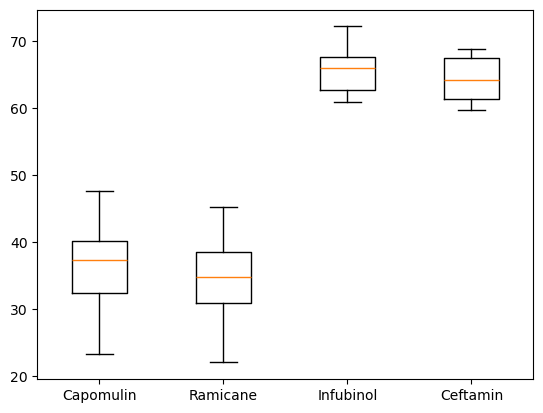

In [17]:
# Put treatments into a list for for loop (and later for plot labels)

regimen_data_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data_list = [[] for i in regimen_data_list]

#I had chatgpt help me write the two lines inside of the if statement

for i, row in max_data.iterrows():
    if row["Drug Regimen"] in regimen_data_list:
        index = regimen_data_list.index(row["Drug Regimen"])
        tumor_data_list[index].append(row["Tumor Volume (mm3)"])
  
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
fig1, ax1 = plt.subplots()

ax1.boxplot(tumor_data_list)

x_axis = np.arange(1, len(regimen_data_list)+ 1)
tick_location = [tick for tick in x_axis]
plt.xticks(tick_location, regimen_data_list , rotation = "horizontal")



    
    # Determine outliers using upper and lower bounds

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

<Axes: title={'center': 'Mouse-n364 Tumor volume growth over time'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

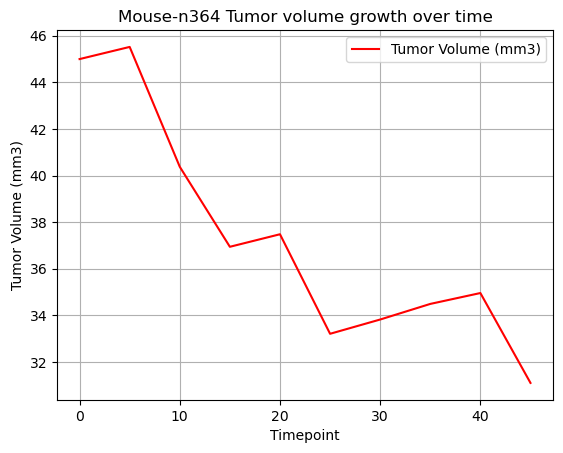

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_n364 = mouse_data_cleaned.loc[mouse_data_cleaned["Mouse ID"] == "n364"]
mouse_n364.plot("Timepoint", "Tumor Volume (mm3)", grid = 'gray', color = 'red', ylabel = "Tumor Volume (mm3)", title = "Mouse-n364 Tumor volume growth over time")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

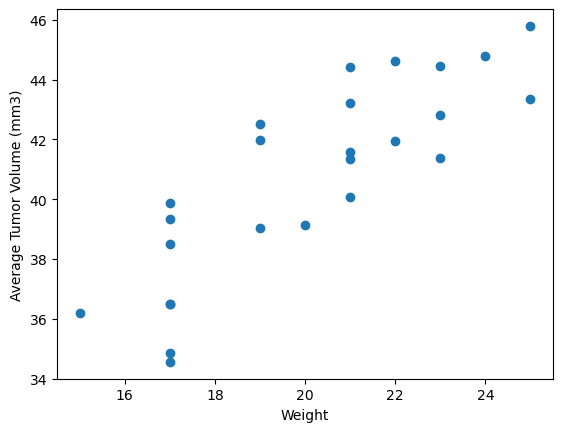

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_capomulin = mouse_data_cleaned.loc[mouse_data_cleaned["Drug Regimen"] == "Capomulin"]
mouse_capomulin_grp = mouse_capomulin.groupby("Mouse ID")
plt.scatter(mouse_capomulin_grp["Weight (g)"].mean(), mouse_capomulin_grp["Tumor Volume (mm3)"].mean())
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

Text(0, 0.5, 'Average Tumor Volume (mm3)')

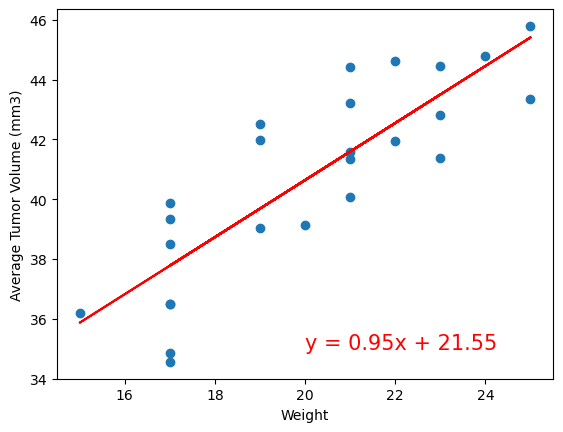

In [47]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = mouse_capomulin_grp["Weight (g)"].mean()
y_values = mouse_capomulin_grp["Tumor Volume (mm3)"].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,color = "red")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.scatter(mouse_capomulin_grp["Weight (g)"].mean(), mouse_capomulin_grp["Tumor Volume (mm3)"].mean())
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")